## 随机生成线性回归模型的训练数据

In [14]:
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [27]:
def generateData():
    """
    随机生成数据
    """
    np.random.seed(49)
    x = np.arange(10, 40)
    error = np.round(np.random.randn(30), 2)  # 保留小数点后两位有效数字
    y = 0.7 * x + error
    return pd.DataFrame({"x": x, "y": y})

def visualizeData(data):
    """
    数据可视化
    """
    # 为在 Matplotlib 中显示中文，设置特殊字体
    plt.rcParams["font.sans-serif"] = ["SimHei"]
    # 创建一个图形框，在里面只画一幅图
    fig = plt.figure(figsize=(6, 6), dpi=80)
    ax = fig.add_subplot(111)
    # 在 Matplotlib 中显示中文，需要使用 unicode
    # 在 Python3 中，str 不需要 decode
    if sys.version_info[0] == 3:
        ax.set_title("%s" % "线性回归示例")
    else:
        ax.set_title("%s" % "线性回归示例".decode("utf-8"))
    ax.set_xlabel("$x$")
    ax.set_xticks(np.arange(10, 40, 5))
    ax.set_ylabel("$y$")
    ax.set_yticks(np.arange(10, 40, 5))
    # 画点图，点的颜色为蓝色
    ax.scatter(data.x, data.y, color="b", label="$y = 0.7x + \epsilon$")
    legend = plt.legend(shadow=True)
    legend.get_frame().set_facecolor("#6F93AE")
    # 展示上面所画的图片。图片将阻断程序的运行，直至所有的图片被关闭
    # 在Python shell里面，可以设置参数"block=False"，使阻断失效。
    plt.show()

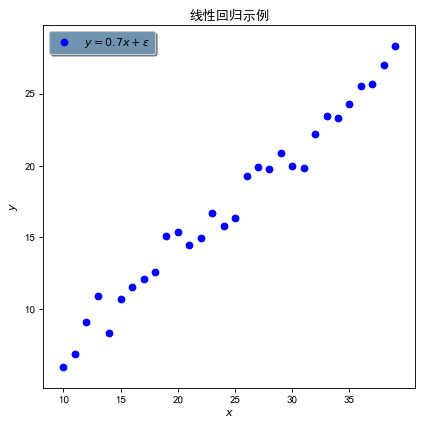

In [29]:
data = generateData()
visualizeData(data)

# 训练线性回归模型

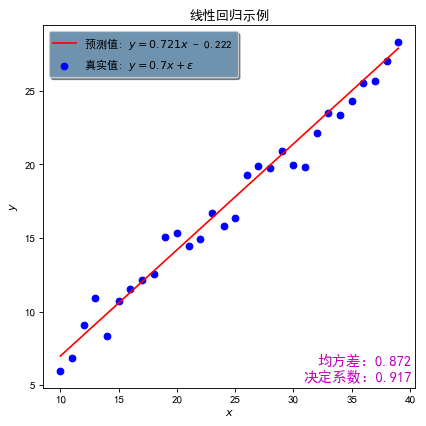

In [31]:
from sklearn import linear_model


def evaluateModel(model, testData, features, labels):
    """
    计算线性模型的均方差和决定系数

    参数
    ----
    model : LinearRegression, 训练完成的线性模型

    testData : DataFrame，测试数据

    features : list[str]，特征名列表

    labels : list[str]，标签名列表

    返回
    ----
    error : np.float64，均方差

    score : np.float64，决定系数
    """
    # 均方差(The mean squared error)，均方差越小越好
    error = np.mean((model.predict(testData[features]) - testData[labels])**2)
    # 决定系数(Coefficient of determination)，决定系数越接近1越好
    score = model.score(testData[features], testData[labels])
    return error, score


def visualizeModel(model, data, features, labels, error, score):
    """
    模型可视化
    """
    # 为在Matplotlib中显示中文，设置特殊字体
    plt.rcParams['font.sans-serif'] = ['SimHei']
    # 创建一个图形框
    fig = plt.figure(figsize=(6, 6), dpi=80)
    # 在图形框里只画一幅图
    ax = fig.add_subplot(111)
    # 在Matplotlib中显示中文，需要使用unicode
    # 在Python3中，str不需要decode
    if sys.version_info[0] == 3:
        ax.set_title(u'%s' % "线性回归示例")
    else:
        ax.set_title(u'%s' % "线性回归示例".decode("utf-8"))
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    # 画点图，用蓝色圆点表示原始数据
    # 在Python3中，str不需要decode
    if sys.version_info[0] == 3:
        ax.scatter(
            data[features],
            data[labels],
            color='b',
            label=u'%s: $y = 0.7x + \epsilon$' % "真实值")
    else:
        ax.scatter(
            data[features],
            data[labels],
            color='b',
            label=u'%s: $y = 0.7x + \epsilon$' % "真实值".decode("utf-8"))
    # 根据截距的正负，打印不同的标签
    if model.intercept_ > 0:
        # 画线图，用红色线条表示模型结果
        # 在Python3中，str不需要decode
        if sys.version_info[0] == 3:
            ax.plot(data[features], model.predict(data[features]), color='r',
                label=u'%s: $y = %.3fx$ + %.3f'\
                % ("预测值", model.coef_, model.intercept_))
        else:
            ax.plot(data[features], model.predict(data[features]), color='r',
                label=u'%s: $y = %.3fx$ + %.3f'\
                % ("预测值".decode("utf-8"), model.coef_, model.intercept_))
    else:
        # 在Python3中，str不需要decode
        if sys.version_info[0] == 3:
            ax.plot(data[features], model.predict(data[features]), color='r',
                label=u'%s: $y = %.3fx$ - %.3f'\
                % ("预测值", model.coef_, abs(model.intercept_)))
        else:
            ax.plot(data[features], model.predict(data[features]), color='r',
                label=u'%s: $y = %.3fx$ - %.3f'\
                % ("预测值".decode("utf-8"), model.coef_, abs(model.intercept_)))
    legend = plt.legend(shadow=True)
    legend.get_frame().set_facecolor('#6F93AE')
    # 显示均方差和决定系数
    # 在Python3中，str不需要decode
    if sys.version_info[0] == 3:
        ax.text(0.99, 0.01,
            u'%s%.3f\n%s%.3f'\
            % ("均方差：", error, "决定系数：", score),
            style='italic', verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes, color='m', fontsize=13)
    else:
        ax.text(0.99, 0.01,
           u'%s%.3f\n%s%.3f'\
           % ("均方差：".decode("utf-8"), error, "决定系数：".decode("utf-8"), score),
           style='italic', verticalalignment='bottom', horizontalalignment='right',
           transform=ax.transAxes, color='m', fontsize=13)
    # 展示上面所画的图片。图片将阻断程序的运行，直至所有的图片被关闭
    # 在Python shell里面，可以设置参数"block=False"，使阻断失效。
    plt.show()


def trainModel(trainData, features, labels):
    """
    利用训练数据，估计模型参数

    参数
    ----
    trainData : DataFrame，训练数据集，包含特征和标签

    features : 特征名列表

    labels : 标签名列表

    返回
    ----
    model : LinearRegression, 训练好的线性模型
    """
    # 创建一个线性回归模型
    model = linear_model.LinearRegression()
    # 训练模型，估计模型参数
    model.fit(trainData[features], trainData[labels])
    return model


def linearModel(data):
    """
    线性回归模型建模步骤展示

    参数
    ----
    data : DataFrame，建模数据
    """
    features = ["x"]
    labels = ["y"]
    # 划分训练集和测试集
    trainData = data[:15]
    testData = data[15:]
    # 产生并训练模型
    model = trainModel(trainData, features, labels)
    # 评价模型效果
    error, score = evaluateModel(model, testData, features, labels)
    # 图形化模型结果
    visualizeModel(model, data, features, labels, error, score)


linearModel(data)

# 分析线性回归模型

## 使用 statsmodels 搭建线性回归模型

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     1251.
Date:                Tue, 14 Aug 2018   Prob (F-statistic):           8.75e-25
Time:                        19:11:48   Log-Likelihood:                -39.552
No. Observations:                  30   AIC:                             83.10
Df Residuals:                      28   BIC:                             85.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1005      0.513      0.196      0.8

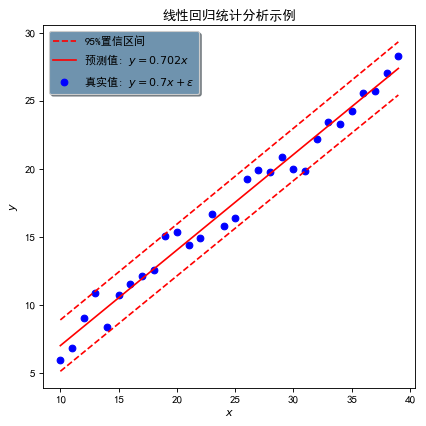

In [35]:
# 保证脚本与Python3兼容
from __future__ import print_function

import os
import sys

import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt
import pandas as pd


def modelSummary(re):
    """
    分析线性回归模型的统计性质
    """
    # 整体统计分析结果
    print(re.summary())
    # 在Windows下运行此脚本需确保Windows下的命令提示符(cmd)能显示中文
    # 用f test检测x对应的系数a是否显著
    print("检验假设x的系数等于0：")
    print(re.f_test("x=0"))
    # 用f test检测常量b是否显著
    print("检测假设const的系数等于0：")
    print(re.f_test("const=0"))
    # 用f test检测a=1, b=0同时成立的显著性
    print("检测假设x的系数等于1和const的系数等于0同时成立：")
    print(re.f_test(["x=1", "const=0"]))


def visualizeModel(re, data, features, labels):
    """
    模型可视化
    """
    # 计算预测结果的标准差，预测下界，预测上界
    prstd, preLow, preUp = wls_prediction_std(re, alpha=0.05)
    # 为在Matplotlib中显示中文，设置特殊字体
    plt.rcParams['font.sans-serif']=['SimHei']
    # 创建一个图形框
    fig = plt.figure(figsize=(6, 6), dpi=80)
    # 在图形框里只画一幅图
    ax = fig.add_subplot(111)
    # 在Matplotlib中显示中文，需要使用unicode
    # 在Python3中，str不需要decode
    if sys.version_info[0] == 3:
        ax.set_title(u'%s' % "线性回归统计分析示例")
    else:
        ax.set_title(u'%s' % "线性回归统计分析示例".decode("utf-8"))
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    # 画点图，用蓝色圆点表示原始数据
    # 在Python3中，str不需要decode
    if sys.version_info[0] == 3:
        ax.scatter(data[features], data[labels], color='b',
            label=u'%s: $y = 0.7x + \epsilon$' % "真实值")
    else:
        ax.scatter(data[features], data[labels], color='b',
            label=u'%s: $y = 0.7x + \epsilon$' % "真实值".decode("utf-8"))
    # 画线图，用红色虚线表示95%置信区间
    # 在Python3中，str不需要decode
    if sys.version_info[0] == 3:
        ax.plot(data[features], preUp, "r--", label=u'%s' % "95%置信区间")
        ax.plot(data[features], re.predict(data[features]), color='r',
            label=u'%s: $y = %.3fx$'\
            % ("预测值", re.params[features]))
    else:
        ax.plot(data[features], preUp, "r--", label=u'%s' % "95%置信区间".decode("utf-8"))
        ax.plot(data[features], re.predict(data[features]), color='r',
            label=u'%s: $y = %.3fx$'\
            % ("预测值".decode("utf-8"), re.params[features]))
    ax.plot(data[features], preLow, "r--")
    legend = plt.legend(shadow=True)
    legend.get_frame().set_facecolor('#6F93AE')
    plt.show()


def trainModel(X, Y):
    """
    训练模型
    """
    model = sm.OLS(Y, X)
    re = model.fit()
    return re


def linearModel(data):
    """
    线性回归统计性质分析步骤展示

    参数
    ----
    data : DataFrame，建模数据
    """
    features = ["x"]
    labels = ["y"]
    Y = data[labels]
    # 加入常量变量
    X = sm.add_constant(data[features])
    # 构建模型
    re = trainModel(X, Y)
    # 分析模型效果
    modelSummary(re)
    # const并不显著，去掉这个常量变量
    resNew = trainModel(data[features], Y)
    # 输出新模型的分析结果
    print(resNew.summary())
    # 将模型结果可视化
    visualizeModel(resNew, data, features, labels)


linearModel(data)

In [33]:
data

,x,y
0,10,5.96
1,11,6.88
2,12,9.07
3,13,10.92
4,14,8.36
5,15,10.73
6,16,11.54
7,17,12.13
8,18,12.59
9,19,15.10
